# Random Forest
앙상블ensemble은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법이다.  
앞서 확인한 것처럼 결정 트리의 주요 단점은 모형이 불안정하고 훈련 데이터에 과대적합되는 경향이 있다는 것이다. 랜덤 포레스트는 이 문제를 회피할 수 있는 방법이다. 랜덤 포레스트는 기본적으로 조금씩 다른 여러 결정 트리의 묶음이다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### Random Forest 모형의 생성

- 랜덤 포레스트 모델을 만들려면 생성할 트리의 개수를 정해야 한다.(RandomForestRegressor나 RandomForestClassifier의 n_estimators 매개변수).  
- 트리를 만들기 위해 먼저 데이터의 부트스트랩 샘플bootstrap sample을 생성한다.
- 그다음 이렇게 만든 데이터셋으로 결정 트리를 만든다.
- 결정 트리 생성시 특성을 랜덤하게 선택한다. 몇 개의 특성을 고를지는 max_features 매개변수로 조정한다.
- max_features를 n_features로 설정하면 트리의 각 분기에서 모든 특성을 고려하므로 특성 선택에 무작위성이 들어가지 않는다.
- max_features=1로 설정하면 트리의 분기는 테스트할 특성을 고를 필요가 없게 되며 그냥 무작위로 선택한 특성의 임계값을 찾기만 하면 된다.

**Parameter to Tune**

- n_estimators - 생성할 tree의 갯수 (more is always better)
- max_depth, 가지치기 수준
- max_features, for randomization , 기본값
    - max_features = sqrt(n_features), for classification
    - max_features = log2(n_features), for regression

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.972


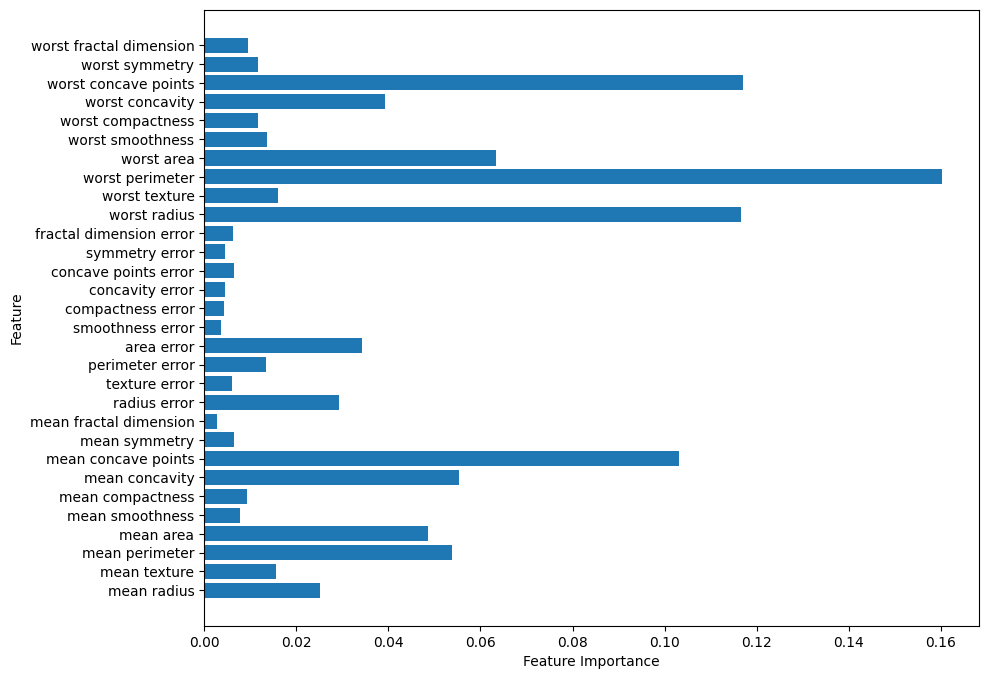

In [ ]:
n_features = cancer.data.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

## 실습하기
1. sklearn의 wine 데이터를 다음과 같이 읽어들이시오.
```
from sklearn.datasets import load_wine
data = load_wine()
x = data.data
y = data.target
```

2. RandomForest을 사용하여 와인의 종류를 분류하는 분류모형을 생성하시오.
3. 생성된 모형에서 변수의 중요도를 확인해보시오.
4. DecisionTree와 차이점을 비교해 보시오.

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()
x = data.data
y = data.target

In [ ]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3